# Intro to Matplotlib


####  Review and Outline

Great Work! We have made it this far...we know a few important packages in python, e.g., `pandas` and `numpy`, and how to use them to do numeric computings.   

Where are we going to know...we will get into the shining part for every data report: **data visualization**, as the saying goes, "a picture is worth a thousand words". Can you imagine an presentation or report regarding data analysis without graphs? Probably not often.

We will start with basic concepts and techinical components in graphs. Then I organize the majority of this lecture around the question **How does GDP and it's expenditure componenets co-move?** I'll set it up like a mini-project...we will practice previous skills to downlad and manipulate the data, then we will learn about ploting the data (and doing so in a way to explore how GDP and its expenditure componenets move). 


[This notebook largely follows the discussion in the Book.](https://nyudatabootcamp.gitbook.io/thebook/graphs1)

#### Python

In this notebook, we will learn how to (i) generate the `fig` and `ax` of a figure and then (ii) use the methods associated with thoes objects to manipulate the properties of the figure to make it informative and nice looking. 

**Buzzwords.** Data visualization, time series, cross sectional data


In [2]:
# Loading the packages

import pandas as pd                 # Our pandas package

# In order to use the pandas_datareader, we have the following lines of code, hard to explain.
# New version for pandas. In the past, we used pandasdatareader, but might be not working anymore
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library

%matplotlib inline 
# This line tells jupyter to plot the graphs within the notebook

---
## Plotting Concepts

### Data visualisation

Plot or data visualisationis an abstraction/aggregation to represent data, which can be used to communicate information, sense making and thus pass the values of data.  

So why do call it as an **abstraction**? For almost every graph, there is a loss of data (often not so important ones in current setting), because it is impossible for human beings to absorb all the numbers, strings at once. We often use different physical attributes of vision (length, position, size, shape, and color, etc) to make the transformation of data. 

Thus sometimes, the instentions of visualisation designers may directly have impacts on what we perceive/understand about the data. Also, sometimes even a design decision can motivate the omission of important data. So we will keep this in mind either from the perspective of a reader or designer. Please see the following intuitive example.   


In [14]:
# plot the data from *Fama-French returns*.
ff = data.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]               # extract rm (market) and rf (riskfree)
ff.head(5)


,rm,rf
Date,,
2010,17.49,0.12
2011,0.48,0.04
2012,16.34,0.06
2013,35.22,0.02
2014,11.72,0.02


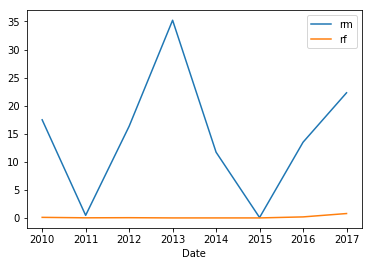

In [15]:
ff.plot()

This is an example of bad practice for data visualization. Why? It uses line graphs to plot two different scales of data on a *single* axis. Moreoer, it might confuse/disguise you that the **rf** is essentially the same or flat during the time period. However, it is not, it is **six times larger** in fact!



### Time series vs Cross sectional

A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. The data typically has 3 things in common:

* Arrival is almost always recorded as a new entry
* The data typically arrives in time order
* Time is a primary axis (time-intervals can be either regular or irregular)

As we'll see later, time series are very frequently plotted via line charts. A typical example of time series data is as follow. 

In [4]:
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = list(range(2003,2014))        # use range for years 2003-2013

# Note that we set the index
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year)
print(us)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7


While **cross sectional** data is observations that come from different individuals or groups at a single point in time. There it differs from time series data, which the objects are observations varying in time but from a single individuals or groups.

A typical example of cross sectional data is as follow. We will usually use bars graphs to show the relationships among different groups.

In [6]:
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wbdf = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)

print(wbdf)

           country  gdppc
USA  United States   53.1
FRA         France   36.9
JPN          Japan   36.3
CHN          China   11.9
IND          India    5.4
BRA         Brazil   15.0
MEX         Mexico   16.5


### Univariate and Multivariate analysis 

**Univariate analysis** is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable, it doesn’t deal with causes or relationships. We can usually get some insights regarding the statistic features of the data, such as empirical distributions, mean, and skewness, etc. The major purpose univariate bivariate analysis is to explain.

In practice, we usually perform univariate analysis as a stepping stone for futher analysis.


**Multivariate analysis** deals with more than one variables. It deals with causes or relationships. The major purpose multivariate bivariate analysis is to explain.

There are many ways to play with mltivariates depending on your goals.  

---
## Matplotlib 

Python's leading graphics package is **Matplotlib**, which is designed for creating publication-quality plots.

Matplotlib can be used in a number of different ways:

* Approach #1:  Apply plot methods to dataframes.
* Approach #2:  Create figure objects and apply methods to them.

They call on similar functionality, but use different syntax to get it.



####  Approach #1:  Apply plot methods to dataframes


The simplest way to produce graphics from a dataframe is to apply a plot method to it.  Simple is good, we do this a lot.

If we compare this to Excel, we will see that a number of things are preset for us:

* Data.  By default (meaning, if we don't do anything to change it) the data consists of the whole dataframe.
* Chart type.  We'll see below that we have options for lines, bars, or other things.
* `x` and `y` variables.  By default, the `x` variable is the dataframe's index and the `y` variables are the columns of the dataframe -- all of them that can be plotted (e.g. columns with a numeric dtype).

We can change all of these things, just as we can in Excel, but that's the starting point.

**Example (line plot).**  Enter the statement `us.plot()` into a code cell and run it.  This plots every column of the dataframe `us` as a line against the index, the year of the observation.  The lines have different colors.  We didn't ask for this, it's built in.  A legend associates each variable name with a line color.  This is also built in.


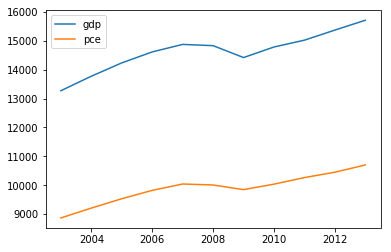

In [12]:
us.plot()

**Example (single line plot).**  We just plotted all the variables -- all two of them -- in the dataframe `us`.  To plot one line, we apply the same method to a single variable -- a series.  The statement `us['gdp'].plot()` plots GDP alone.  The first part -- `us['gdp']` -- is the single variable GDP.  The second part -- `.plot()` -- plots it.


**Example (single line plot 2)**. In addition to getting a series from our dataframe and then plotting the series, we could also set the `y` argument when we call the plot method. The statement `us.plot(y="gdp")` will produce the same plot as `us['gdp'].plot()`.


#### Approach #2:  Create figure objects and apply methods


This approach was mysterious to us at first, but it's now our favorite. The idea is to generate an object -- two objects, in fact -- and apply methods to them to produce the various elements of a graph: the data, their axes, their labels, and so on.



We do this -- as usual -- one step at a time.

**Create objects.** The **`fig`** represent the canvas object while **`ax`** is as the object for charging the details, e.g., type of graphs, colors and axis, etc, in each graph on the canvas.


We'll see this ONE line over and over:


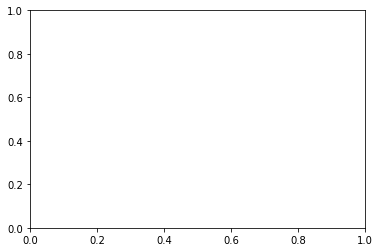

In [7]:
fig, ax = plt.subplots()         # create fig and ax objects

Note that we're using the pyplot function `subplots()`, which creates the objects `fig` and `ax` on the left.   The `subplot()` function produces a blank figure, which is displayed in the Jupyter notebook.  The names `fig` and `ax` can be anything, but these choices are standard.

We say `fig` is a **figure object** and `ax` is an **axis object**.  (Try `type(fig)` and `type(ax)` to see why.)  Once more, the words don't mean what we might think they mean:

* `fig` is a blank canvas for creating a figure.
* `ax` is everything in it:  axes, labels, lines or bars, legend, and so on.

Once we have the objects, we apply methods to them to create graphs.

**Create graphs.**  We create graphs by applying plot-like methods to `ax`.  We typically do this with dataframe plot methods:


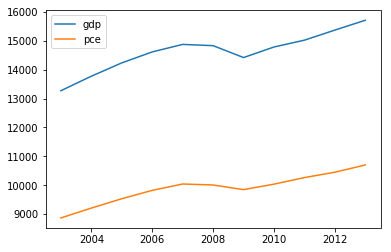

In [8]:
fig, axe = plt.subplots()        # create axis object axe
us.plot(ax=axe)                  # ax= looks for axis object, axe is it

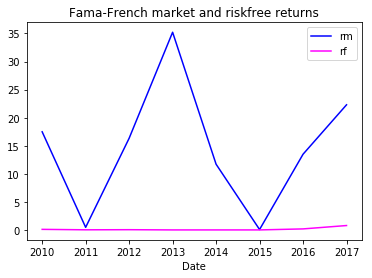

In [11]:
fig, ax = plt.subplots()
ff.plot(ax=ax,
        kind='line',                 # line plot
        color=['blue', 'magenta'],   # line color
        title='Fama-French market and riskfree returns')

---
### Time to practice

**Exercise.**  Let's see if we can teach ourselves the rest:

* Add the argument `kind='bar'` to convert this into a bar chart.
* Add the argument `alpha=0.65` to the bar chart.  What does it do?
* What would you change in the bar chart to make it look better?  Use the help facility to find options that might help.  Which ones appeal to you?



**Exercise (somewhat challenging).** Use the same approach to reproduce our earlier histograms of the Fama-French series.


---
## Bells & Whistles

We now know how to create graphs, but if we're honest with ourselves we'd admit they're a little basic. Fortunately, we just got started. We have a huge number of methods available for changing our plots in any way we wish for the purpose of production-grade plots: Add titles and axis labels, change axis limits, and many other things that haven't crossed our minds yet. 



Here's a short introduction.



### Graph Types

### Graph Options

---
## Review Questions


---
## Summary